### Step 1: Build Data Profiles and Tables

In [1]:
# Load the cleaned data
import pandas as pd
df_cleaned = pd.read_csv('metdata_cleaned.csv')

# Basic statistics for numeric columns
print(df_cleaned.describe())

          objectID  accessionYear  period  dynasty  reign  portfolio  \
count  1000.000000     984.000000     0.0      0.0    0.0        0.0   
mean    808.153000    1939.786585     NaN      NaN    NaN        NaN   
std     889.104245      25.875419     NaN      NaN    NaN        NaN   
min       1.000000    1883.000000     NaN      NaN    NaN        NaN   
25%     291.750000    1918.000000     NaN      NaN    NaN        NaN   
50%     563.000000    1942.000000     NaN      NaN    NaN        NaN   
75%     823.250000    1952.000000     NaN      NaN    NaN        NaN   
max    3278.000000    2023.000000     NaN      NaN    NaN        NaN   

       artistBeginDate  artistEndDate  objectBeginDate  objectEndDate  \
count       337.000000     366.000000      1000.000000    1000.000000   
mean       1800.813056    3061.860656      1803.334000    1830.556000   
std          57.696796    2890.458531        58.547658      53.504164   
min        1607.000000    1681.000000      1600.000000    1

# Inferential statistics could involve more specific tests, depending on your data and hypotheses

### Inferential Statistics (Markdown)

For inferential statistics, consider specific hypotheses about your dataset. For example, if you suspect that the age of an item (`Object Begin Date`) affects its classification, you might formulate a hypothesis to test this. Use t-tests or ANOVA for comparing means across groups if your data is normally distributed. Otherwise, consider non-parametric alternatives like the Mann-Whitney U test.

### Step 2: Explore Data Relationships

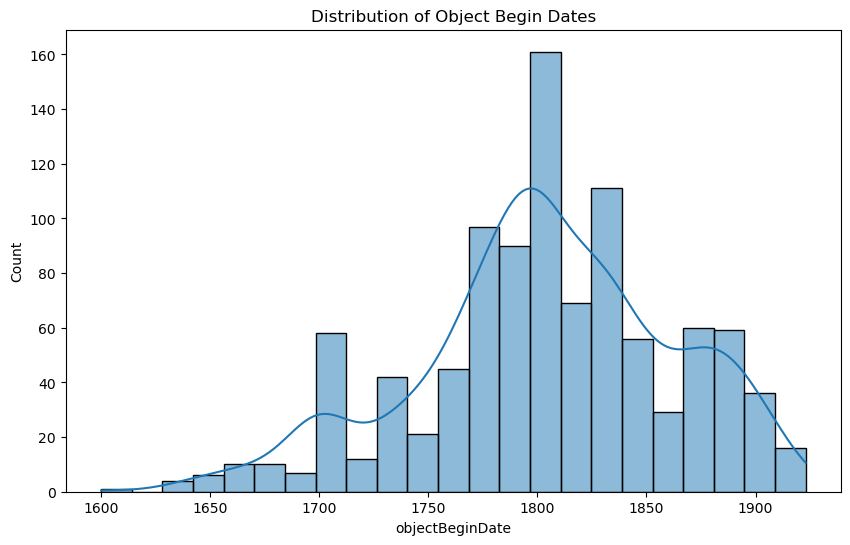

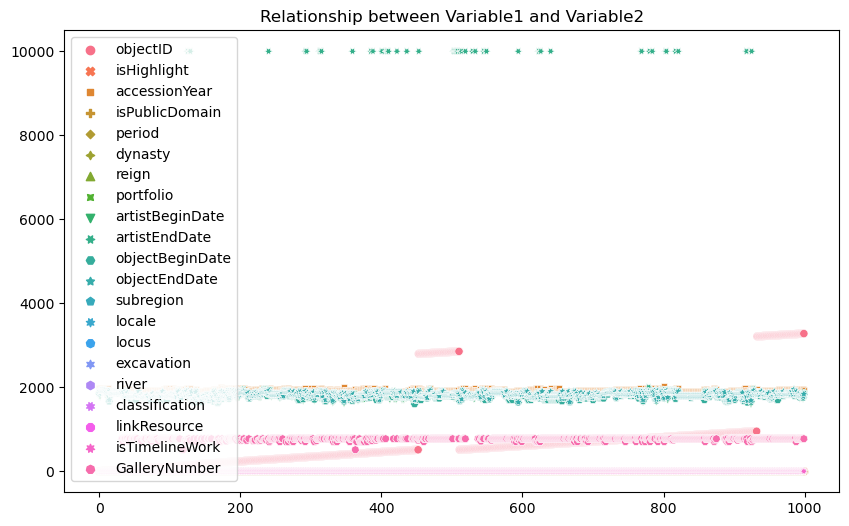

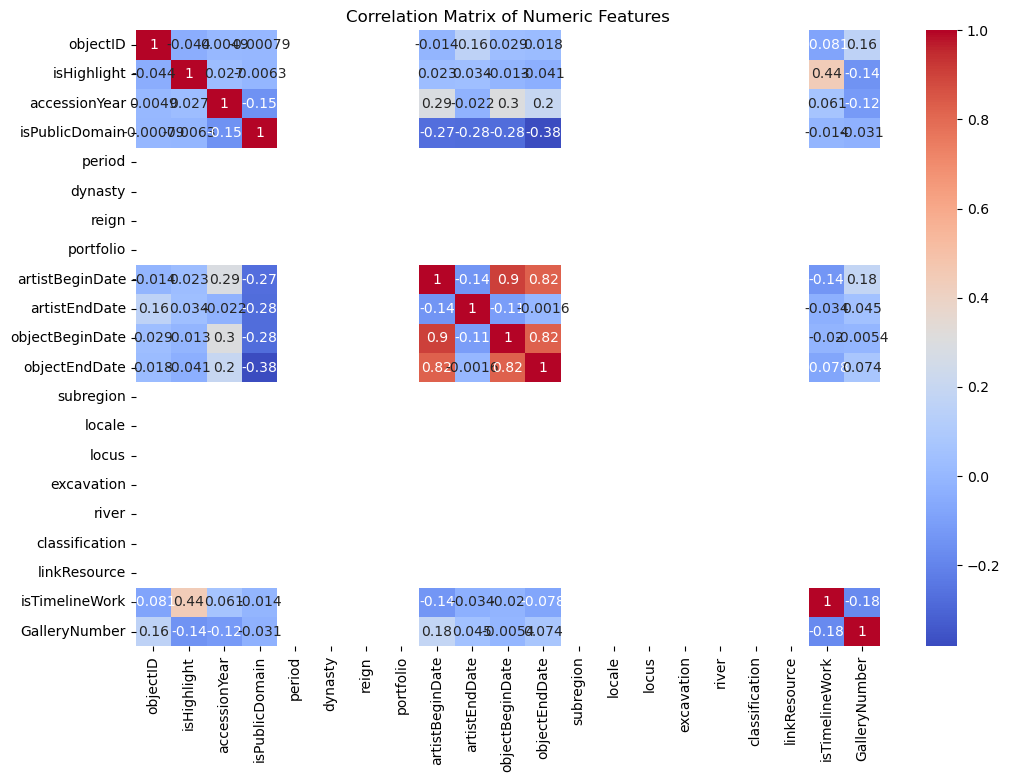

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correcting the column name to 'objectBeginDate'
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['objectBeginDate'], kde=True)
plt.title('Distribution of Object Begin Dates')
plt.show()

# Exploring relationships - scatter plot for numeric variables
# Replace 'Variable1' and 'Variable2' with your dataset's specific variable names
plt.figure(figsize=(10, 6))
sns.scatterplot( data=df_cleaned)
=plt.show()

# Correlation matrix heatmap
corr_matrix = df_cleaned.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

### Data Visualization (Markdown)

Explore relationships between variables further using different types of plots. `sns.pairplot()` is useful for visualizing all pairwise relationships and distributions. For categorical variables, `sns.catplot()` can help compare distributions across categories.

### Step 3: Feature Selection and Engineering

In [7]:
# Load the cleaned data
import pandas as pd
df_cleaned = pd.read_csv('metdata_cleaned.csv')

# Print the column names of the DataFrame
print(df_cleaned.columns)

# Replace 'CategoryColumn' with the actual name of your categorical column
# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df_cleaned, columns=['objectID'])

Index(['objectID', 'isHighlight', 'accessionNumber', 'accessionYear',
       'isPublicDomain', 'primaryImage', 'primaryImageSmall',
       'additionalImages', 'constituents', 'department', 'objectName', 'title',
       'culture', 'period', 'dynasty', 'reign', 'portfolio', 'artistRole',
       'artistPrefix', 'artistDisplayName', 'artistDisplayBio', 'artistSuffix',
       'artistAlphaSort', 'artistNationality', 'artistBeginDate',
       'artistEndDate', 'artistGender', 'artistWikidata_URL', 'artistULAN_URL',
       'objectDate', 'objectBeginDate', 'objectEndDate', 'medium',
       'dimensions', 'measurements', 'creditLine', 'geographyType', 'city',
       'state', 'county', 'country', 'region', 'subregion', 'locale', 'locus',
       'excavation', 'river', 'classification', 'rightsAndReproduction',
       'linkResource', 'metadataDate', 'repository', 'objectURL', 'tags',
       'objectWikidata_URL', 'isTimelineWork', 'GalleryNumber'],
      dtype='object')


In [13]:
# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df_cleaned)

# Handling missing data (if any remain after initial cleaning)
# Imputation example: Fill missing values with the median of the column
df_encoded.fillna(df_encoded.median(), inplace=True)

# Extract numeric columns for normalization
numeric_columns = df_encoded.select_dtypes(include=['float64', 'int64']).columns

# Normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_encoded[numeric_columns]), columns=numeric_columns)


/Users/syedather/opt/anaconda3/envs/orel/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:473: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/Users/syedather/opt/anaconda3/envs/orel/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:474: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


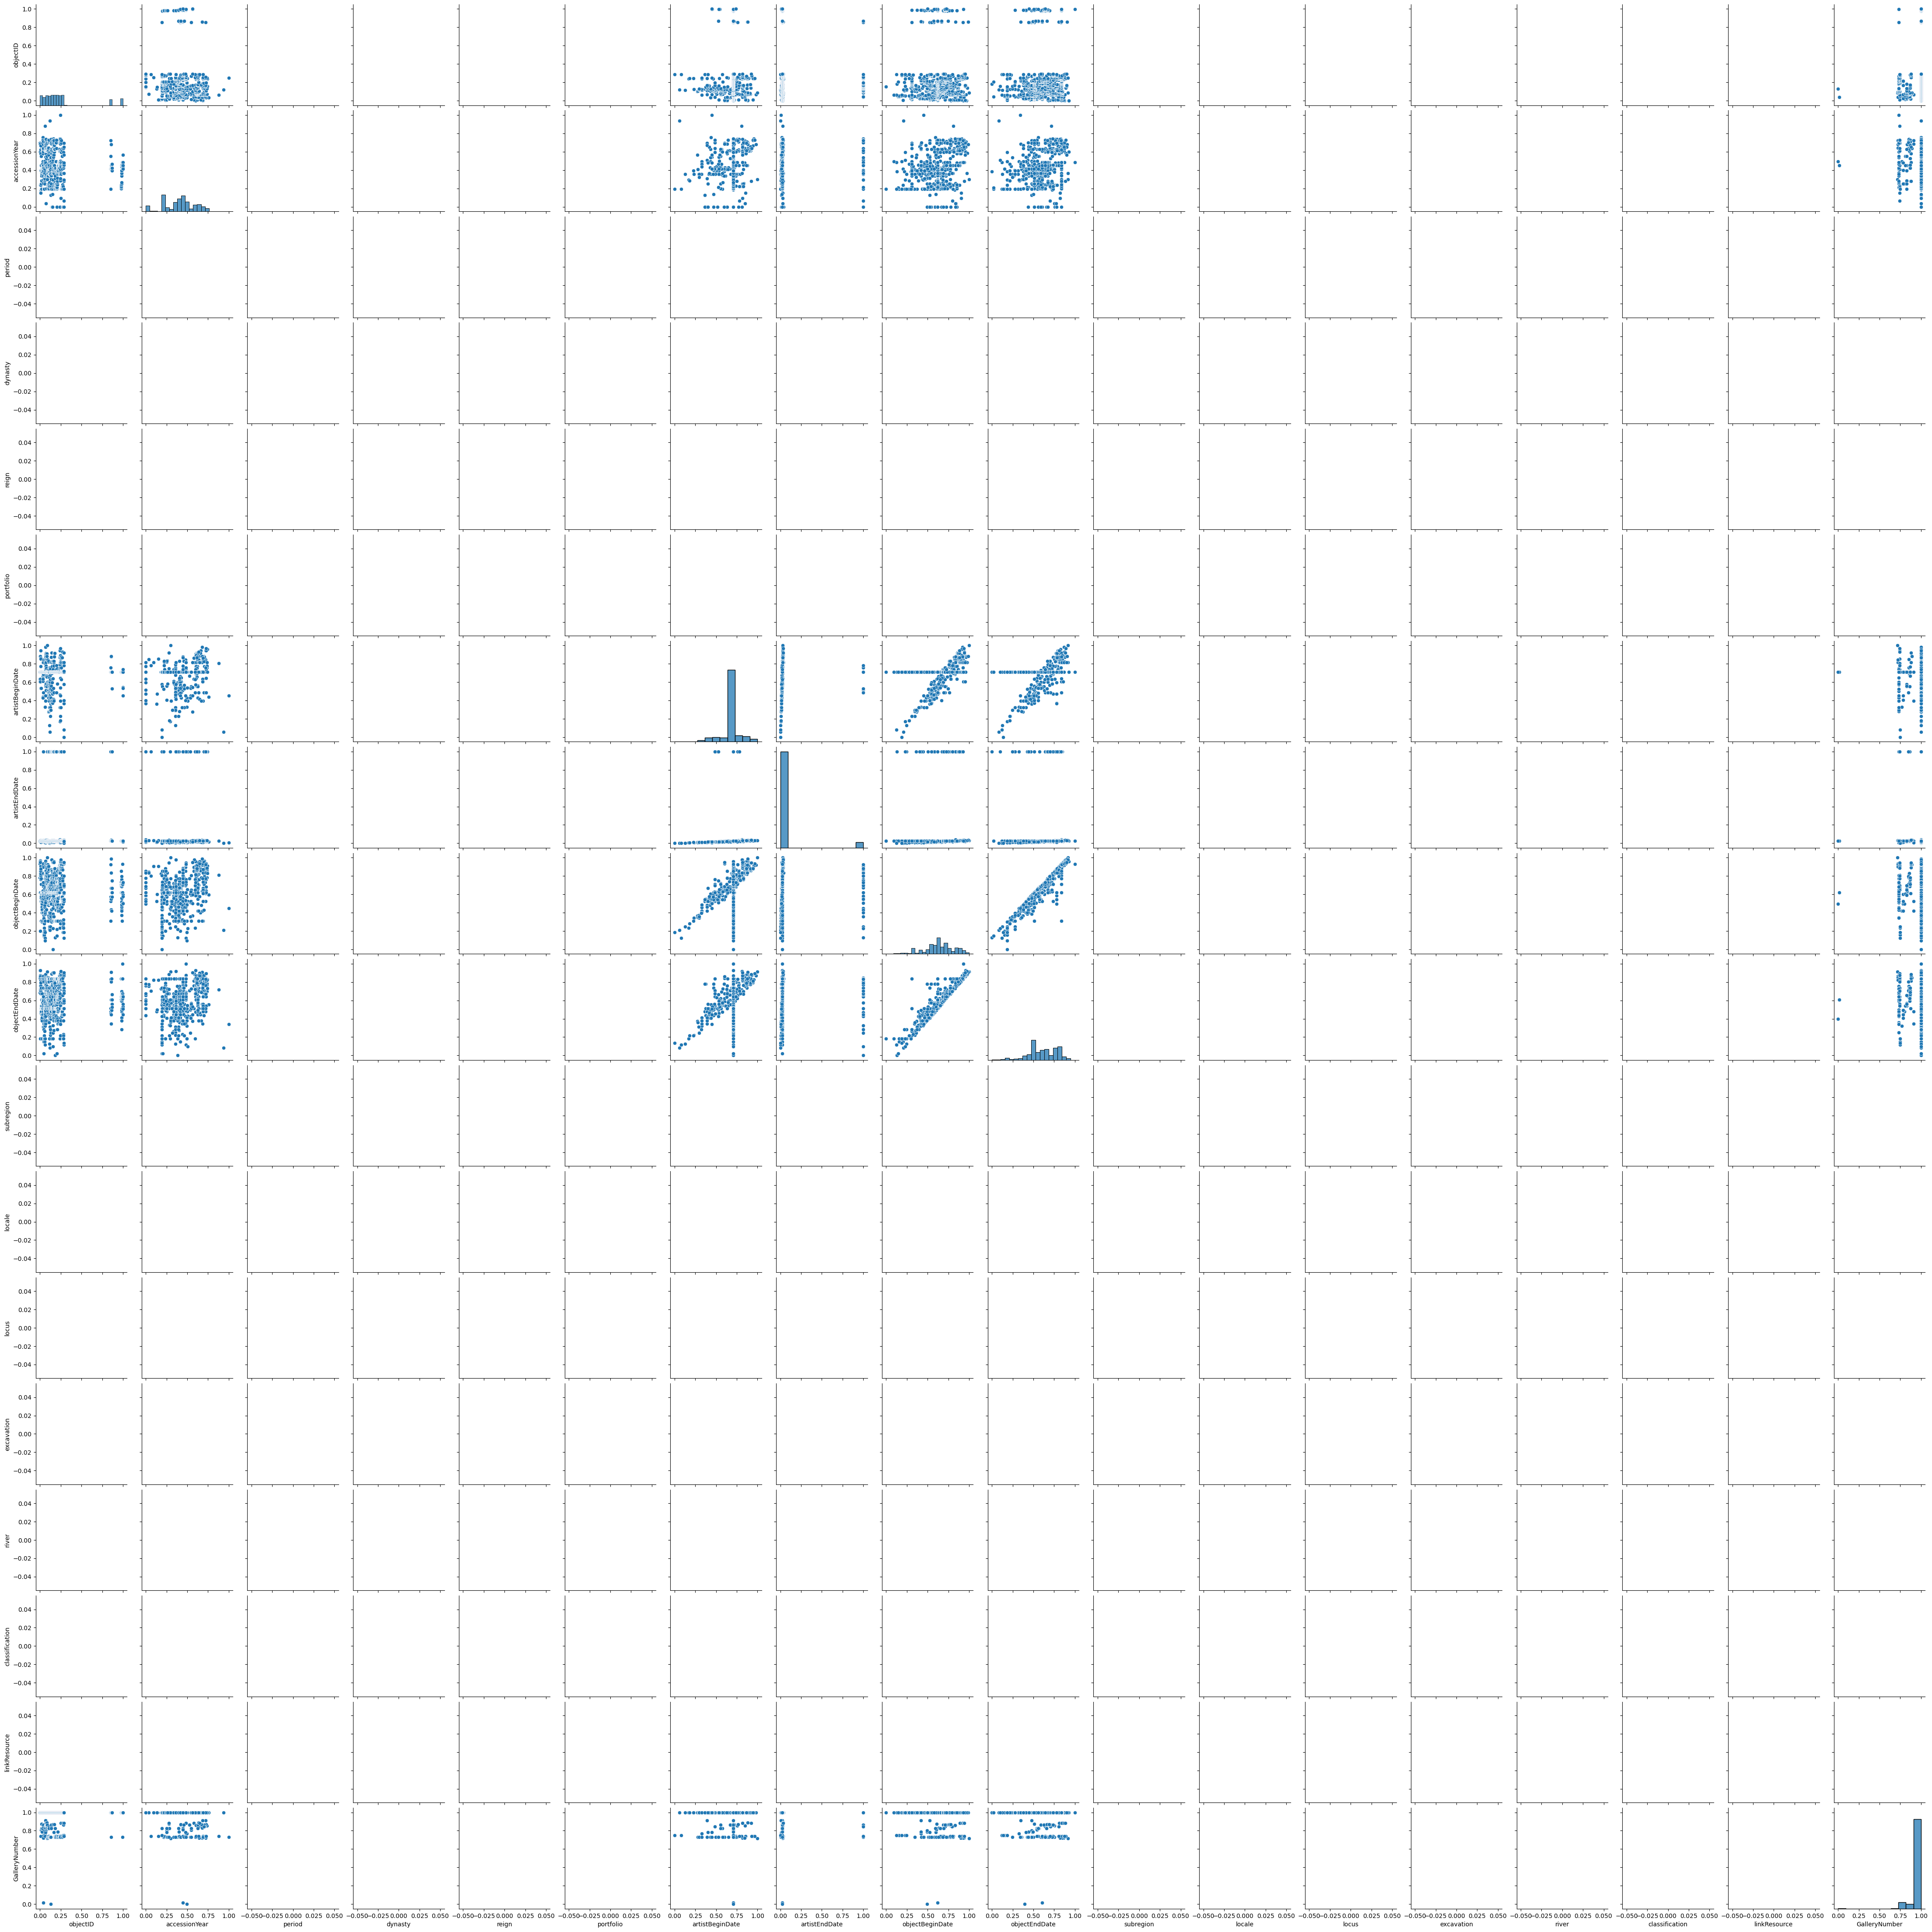

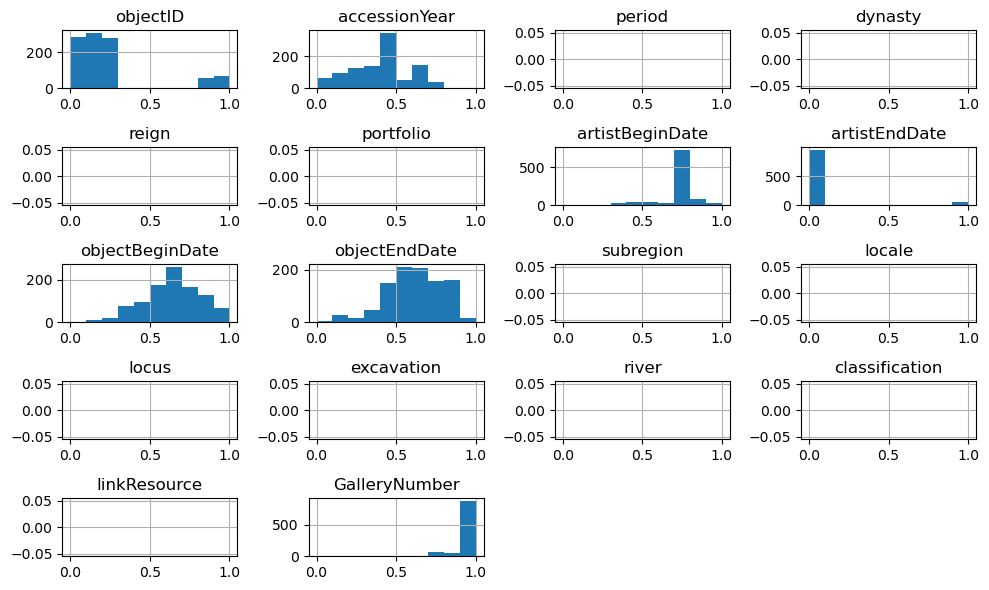

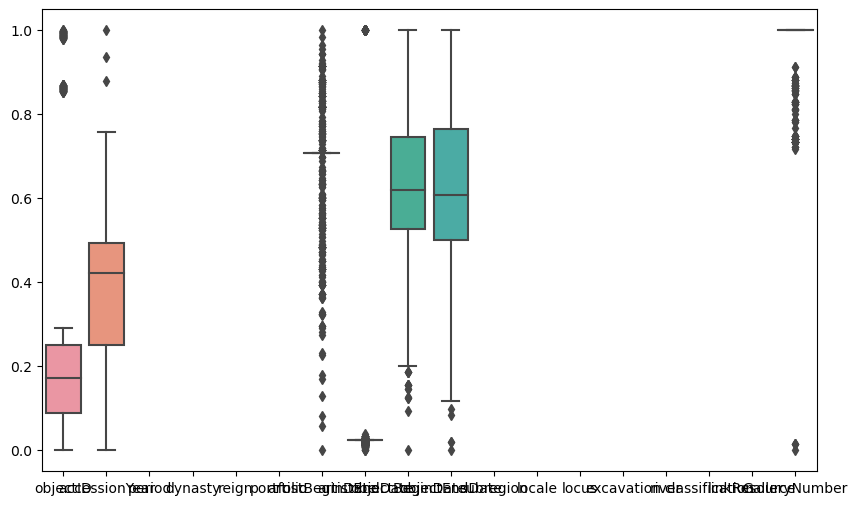

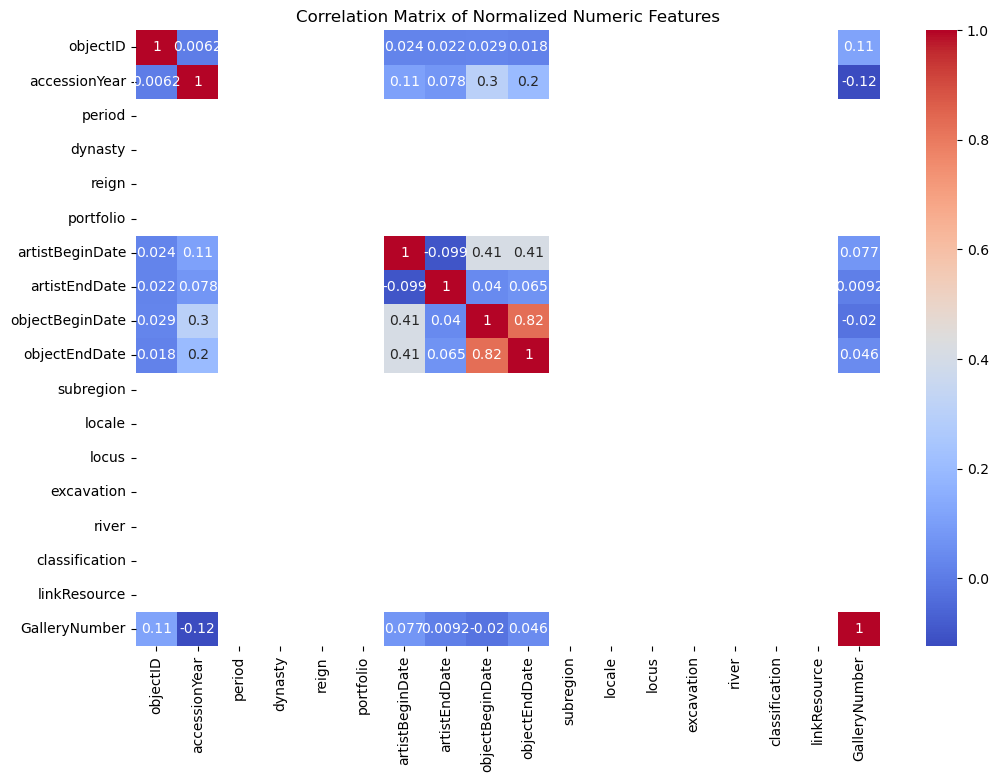

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot
sns.pairplot(df_scaled[numeric_columns])
plt.show()

# Histograms
df_scaled[numeric_columns].hist(figsize=(10, 6))
plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_scaled[numeric_columns])
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_scaled[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Normalized Numeric Features')
plt.show()


### Feature Selection and Engineering (Markdown)

Consider removing or combining features that are highly correlated to reduce multicollinearity. For feature engineering, think creatively about how to represent your data. Can you combine features to create more meaningful ones? For example, if you have `Object Begin Date` and `Object End Date`, you might create a new feature representing the object's age.

### Next Steps

After these steps, dive deeper based on initial findings:
- Conduct hypothesis testing to validate your initial thoughts.
- Iterate on feature selection and engineering based on model performance if you're building predictive models.
- Always visualize your findings to understand the data better and to communicate your results effectively.

These are starting points for your EDA process. Adjustments may be necessary as you delve into the data and uncover its unique characteristics.